# <center> Overturning in T-Space </center>

In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sys
import glob
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
import useful as hb
%matplotlib inline

In [2]:
Year='PSI.nc'
tau=['3', 'Closed']
Figletter = ['a) ','b) ','c) ','d) ']
x = '/noc/msm/scratch/students/hb1g13/Mobilis/Full'


# Define a class that forces representation of float to look a certain way
# This remove trailing zero so '1.0' becomes '1'
class nf(float):
    def __repr__(self):
        str = '%.1f' % (self.__float__(),)
        if str[-1] == '0':
            return '%.0f' % self.__float__()
        else:
            return '%.1f' % self.__float__()
# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r $^oC$ %'
else:
    fmt = '%r $^oC$'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'/'+Year
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
gridfilepath = x+'/3/'
file2 = netCDF4.Dataset(gridfilepath+'grid.nc', 'r')
Zp = file2.variables['Zp1'][:]
Z = file2.variables['Z'][:]
Y = file2.variables['Yp1'][:]
Yc = file2.variables['Y'][:]
msk = file2.variables['HFacS'][:]
lmsk = msk.mean(axis=2)
lmsk[lmsk==0]=np.nan
lmsk[~np.isnan(lmsk)] = 1
Zmatrix = np.zeros((len(Z), len(Y)))
Zmatrix[:, :] = 1
dx = Y[1]-Y[0]  # Find Resolution
dz = Zp[0:len(Zp)-1]-Zp[1:len(Zp)]
Zmatrix = np.apply_along_axis(np.multiply, 0, Zmatrix, dz)
Runs=np.array(runs)

\begin{equation}
\psi_{res}(y, \theta)= \frac{1}{\Delta t} \int_{t_o}^{t_{o}+\Delta t} \int_{0}^{L_x}  \int_{\theta}^{0} vh \,\mathrm{d}\theta \,\mathrm{d}x\,\mathrm{d}t,
\end{equation} 

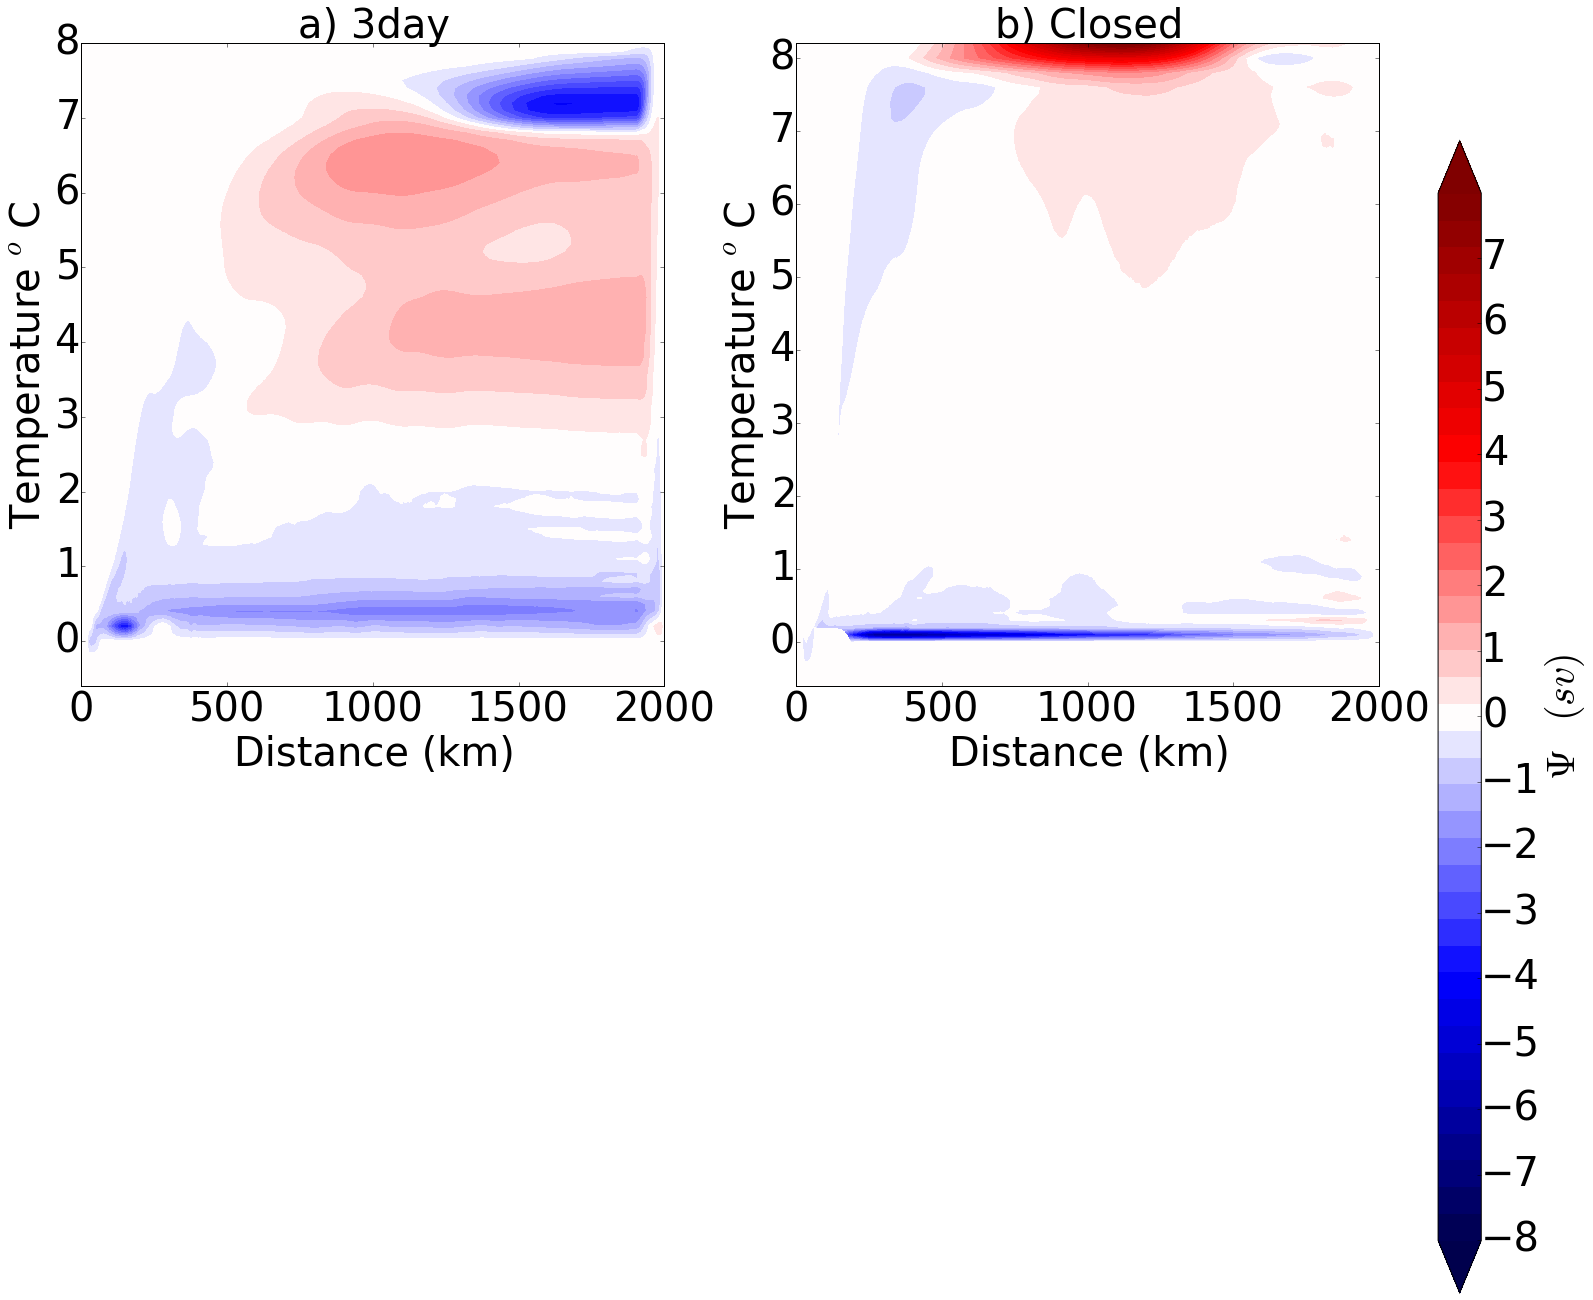

In [6]:
fig=plt.figure(figsize=(20.0,20.0))
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'/'+Year
    file2read = netCDF4.Dataset(fname,'r')
    lvrho = file2read.variables["LaVH1TH"][:]
    VT = np.sum(lvrho*dx,axis=3)  # integrate Vdx along x
    VTfdz = np.cumsum(VT[:,::-1,:],axis=1)  # sum up the water column
    psi = np.mean(VTfdz[:,::-1,:],axis=0)/10**6  # Time average and put into Sv and put back in right order
    y = Y/1000
    z = np.array(range(1,60))
    Rho = np.genfromtxt(x+'/'+str(tau[Runs[i]])+'/Temp', delimiter = ',')
    nolayers = len(psi[:, 1])
    Rho = Rho[0:nolayers]  # The layers package bins a layer so adjust 
    Psi_levs = np.arange(-8., 8., .41)
    Psi_ticks =np.arange(-8., 8., 1.)
    ax = fig.add_subplot(2, 2, i+1)
    p = ax.contourf(y,Rho,psi,Psi_levs, cmap=plt.cm.seismic, extend = 'both') #Use b2r colourmap
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day',fontsize=40)
    if str(tau[Runs[i]])=='Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]),fontsize=40)
    ax.set_xlabel('Distance (km)',fontsize=40)
    ax.set_ylabel('Temperature $^o$C',fontsize=40)
    ax.tick_params(axis='both', which='major', labelsize=40)
plt.tight_layout()
# Add Colorbar
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi \,\, (sv)$',fontsize=40)
cbar.ax.tick_params(labelsize=40)